## Objectives

The scope of services in this phase includes:

- The creation and discussion of a decision tree model to predict the likelihood of purchasing a variable rate annuity (INS).
- Comparison of accuracy measures of this model on the validation data set compared to the best Logistic model created.
- Visualization (if possible) of the final decision tree model.

## Data Provided

Use the following two data sets (provided from the Logistic regression class):

1. The training data set `insurance_t` contains 8,495 observations and 48 variables.
2. The validation data set `insurance_v` contains 2,124 observations and 48 variables.

Be sure to keep missing information as missing and do NOT manually bin the variables.


In [44]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss


## Data Exploration
We check for class imbalances and missing data

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/sjsimmo2/DataMining-Fall/refs/heads/master/insurance_t.csv')
df_val = pd.read_csv('https://raw.githubusercontent.com/sjsimmo2/DataMining-Fall/refs/heads/master/insurance_v.csv')

In [5]:
pd.set_option('display.max_columns', 500)

df_train.head()

,ACCTAGE,DDA,DDABAL,DEP,DEPAMT,CASHBK,CHECKS,DIRDEP,NSF,NSFAMT,PHONE,TELLER,SAV,SAVBAL,ATM,ATMAMT,POS,POSAMT,CD,CDBAL,IRA,IRABAL,LOC,LOCBAL,INV,INVBAL,ILS,ILSBAL,MM,MMBAL,MMCRED,MTG,MTGBAL,CC,CCBAL,CCPURC,SDB,INCOME,HMOWN,LORES,HMVAL,AGE,CRSCORE,MOVED,INAREA,INS,BRANCH,RES
0,0.7,1,1986.81,1,446.93,0,1,1,0,0.00,0.0,0,0,0.00,1,268.88,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0.0,1.0,0.00,1.0,0,4.0,1.0,7.0,87.0,51.0,674.0,0,1,0,B2,R
1,4.1,0,0.00,0,0.00,0,0,0,0,0.00,0.0,0,0,0.00,0,0.00,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0.0,1.0,0.00,0.0,0,30.0,1.0,8.5,97.0,60.0,640.0,0,1,1,B3,S
2,12.3,1,1069.78,5,6813.58,0,13,1,0,0.00,2.0,9,0,0.00,0,0.00,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0.0,1.0,38.62,0.0,0,19.0,0.0,3.0,107.0,55.0,662.0,0,1,1,B7,U
3,0.8,1,190.03,3,880.25,0,1,0,1,5.65,NaN,0,1,11.47,1,1582.34,NaN,NaN,0,0,0,0.0,0,0.0,NaN,NaN,0,0.0,0,0.0,0,0,0.0,NaN,NaN,NaN,1,20.0,0.0,4.0,107.0,40.0,642.0,0,1,0,B14,S
4,1.6,1,257.13,5,3408.35,0,14,0,1,60.25,NaN,1,1,9.80,1,3807.19,NaN,NaN,1,7500,0,0.0,0,0.0,NaN,NaN,0,0.0,0,0.0,0,0,0.0,NaN,NaN,NaN,0,24.0,1.0,8.5,95.0,54.0,732.0,0,1,0,B15,U


In [6]:
df_val.head()

,ACCTAGE,DDA,DDABAL,DEP,DEPAMT,CASHBK,CHECKS,DIRDEP,NSF,NSFAMT,PHONE,TELLER,SAV,SAVBAL,ATM,ATMAMT,POS,POSAMT,CD,CDBAL,IRA,IRABAL,LOC,LOCBAL,INV,INVBAL,ILS,ILSBAL,MM,MMBAL,MMCRED,MTG,MTGBAL,CC,CCBAL,CCPURC,SDB,INCOME,HMOWN,LORES,HMVAL,AGE,CRSCORE,MOVED,INAREA,INS,BRANCH,RES
0,0.9,1,462.12,2,1049.57,0,4,0,0,0.0,0.0,2,1,9010.40,1,863.11,1.0,23.13,0,0,0,0.0,0,0.00,0.0,0.0,0,0.0,0,0.0,0,0,0.00,0.0,0.00,0.0,1,54.0,0.0,4.0,129.0,73.0,667.0,0,1,1,B6,S
1,0.3,1,5681.33,0,0.00,0,0,0,0,0.0,0.0,0,0,0.00,0,0.00,0.0,0.00,1,26700,0,0.0,1,34335.24,0.0,0.0,0,0.0,0,0.0,0,1,284487.09,1.0,310836.87,1.0,0,100.0,1.0,2.5,144.0,48.0,632.0,0,1,1,B2,U
2,4.5,1,1660.44,4,4425.18,0,6,0,0,0.0,1.0,1,1,668.20,1,876.77,0.0,0.00,0,0,0,0.0,1,36455.96,0.0,0.0,0,0.0,0,0.0,0,0,0.00,1.0,40530.61,0.0,0,65.0,1.0,5.0,113.0,49.0,693.0,0,1,0,B17,R
3,2.8,1,1038.37,3,2191.26,0,4,0,0,0.0,NaN,4,1,2652.47,1,220.85,NaN,NaN,0,0,0,0.0,0,0.00,NaN,NaN,0,0.0,0,0.0,0,0,0.00,NaN,NaN,NaN,0,15.0,0.0,4.5,100.0,29.0,653.0,0,1,0,B15,S
4,6.2,0,0.00,0,0.00,0,0,0,0,0.0,0.0,0,0,0.00,0,0.00,0.0,0.00,0,0,0,0.0,0,0.00,0.0,0.0,0,0.0,0,0.0,0,0,0.00,1.0,0.00,0.0,0,71.0,1.0,7.5,141.0,53.0,663.0,0,1,0,B4,S


Lets take a look at the missing data

In [25]:
#find cols w/ missing data
miss_t = df_train.columns[df_train.isnull().any()].tolist()
miss_v = df_val.columns[df_val.isnull().any()].tolist()

#check if train and val are missing the same data
print(miss_t==miss_v)

#check to see what and how many is missing
df_train[miss_t].isnull().sum()

True


ACCTAGE     546
PHONE      1075
POS        1075
POSAMT     1075
INV        1075
INVBAL     1075
CC         1075
CCBAL      1075
CCPURC     1075
INCOME     1537
HMOWN      1463
LORES      1537
HMVAL      1537
AGE        1702
CRSCORE     195
dtype: int64

What percentage of the data is missing? At max 20%.

In [27]:
1702/df_train.shape[0]

0.20035314891112418

## Data Preprocessing
Python is **NOT able to handle categorical variables** in its basic tree classifier. This means that if you do have categorical variables, you will **need to one-hot encode** these variables before using the tree classifier.  

*I identified the catergorical columns previously [here](https://github.com/SterlingHayden/Logistic-Regression/blob/main/HW/HW-01/phase-01.ipynb).*

First lets deal with these missing data points.
1. I will impute the binary columns missing data with the term 'missing', as missing values in predictor variables are not necessarily detrimental, as they may even serve as predictive indicators.
2. Next I will impute the missing continuous columns with the median and include a flag variable to indicate the presence of missing values.

In [30]:
#missing cols and the types they fall under
continuous_cols = ['ACCTAGE', 'PHONE', 'POS', 'POSAMT', 'INVBAL', 'CCBAL', 'INCOME', 'LORES', 'HMVAL', 'AGE', 'CRSCORE']
binary_cols = ['INV', 'CC', 'HMOWN']

#replace ns's with 'Missing', 1's w/ 'Instance', 0' w/ 'Non-Instance' for train and val
for col in binary_cols:
    df_train[col] = df_train[col].replace({1: 'Instance', 0: 'Non-Instance'}).fillna('Missing')
    df_val[col] = df_val[col].replace({1: 'Instance', 0: 'Non-Instance'}).fillna('Missing')


#impute with median and create binary flag column
for col in continuous_cols:
    median_value = df_train[col].median()
    # Create a binary flag variable for imputation
    df_train[f'{col}_imputed'] = df_train[col].isnull().astype(int)
    #impute the missing values with the median
    df_train[col].fillna(median_value)

#do the same for val
for col in continuous_cols:
    median_value = df_train[col].median()
    # Create a binary flag variable for imputation
    df_val[f'{col}_imputed'] = df_val[col].isnull().astype(int)
    #impute the missing values with the median
    df_val[col].fillna(median_value)

In [31]:
df_val

,ACCTAGE,DDA,DDABAL,DEP,DEPAMT,CASHBK,CHECKS,DIRDEP,NSF,NSFAMT,PHONE,TELLER,SAV,SAVBAL,ATM,ATMAMT,POS,POSAMT,CD,CDBAL,IRA,IRABAL,LOC,LOCBAL,INV,INVBAL,ILS,ILSBAL,MM,MMBAL,MMCRED,MTG,MTGBAL,CC,CCBAL,CCPURC,SDB,INCOME,HMOWN,LORES,HMVAL,AGE,CRSCORE,MOVED,INAREA,INS,BRANCH,RES,ACCTAGE_imputed,PHONE_imputed,POS_imputed,POSAMT_imputed,INVBAL_imputed,CCBAL_imputed,INCOME_imputed,LORES_imputed,HMVAL_imputed,AGE_imputed,CRSCORE_imputed
0,0.9,1,462.12,2,1049.57,0,4,0,0,0.00,0.0,2,1,9010.40,1,863.11,1.0,23.13,0,0,0,0.00,0,0.00,Non-Instance,0.0,0,0.00,0,0.00,0,0,0.00,Non-Instance,0.00,0.0,1,54.0,Non-Instance,4.0,129.0,73.0,667.0,0,1,1,B6,S,0,0,0,0,0,0,0,0,0,0,0
1,0.3,1,5681.33,0,0.00,0,0,0,0,0.00,0.0,0,0,0.00,0,0.00,0.0,0.00,1,26700,0,0.00,1,34335.24,Non-Instance,0.0,0,0.00,0,0.00,0,1,284487.09,Instance,310836.87,1.0,0,100.0,Instance,2.5,144.0,48.0,632.0,0,1,1,B2,U,0,0,0,0,0,0,0,0,0,0,0
2,4.5,1,1660.44,4,4425.18,0,6,0,0,0.00,1.0,1,1,668.20,1,876.77,0.0,0.00,0,0,0,0.00,1,36455.96,Non-Instance,0.0,0,0.00,0,0.00,0,0,0.00,Instance,40530.61,0.0,0,65.0,Instance,5.0,113.0,49.0,693.0,0,1,0,B17,R,0,0,0,0,0,0,0,0,0,0,0
3,2.8,1,1038.37,3,2191.26,0,4,0,0,0.00,0.0,4,1,2652.47,1,220.85,0.0,0.00,0,0,0,0.00,0,0.00,missing,0.0,0,0.00,0,0.00,0,0,0.00,missing,0.00,NaN,0,15.0,Non-Instance,4.5,100.0,29.0,653.0,0,1,0,B15,S,0,0,0,0,0,0,0,0,0,0,0
4,6.2,0,0.00,0,0.00,0,0,0,0,0.00,0.0,0,0,0.00,0,0.00,0.0,0.00,0,0,0,0.00,0,0.00,Non-Instance,0.0,0,0.00,0,0.00,0,0,0.00,Instance,0.00,0.0,0,71.0,Instance,7.5,141.0,53.0,663.0,0,1,0,B4,S,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.7,1,788.48,6,4803.10,0,15,1,1,22.52,0.0,0,1,468.36,1,3244.96,1.0,40.35,0,0,1,1380.03,0,0.00,Non-Instance,0.0,0,0.00,0,0.00,0,0,0.00,Instance,4843.67,1.0,1,38.0,Non-Instance,5.0,99.0,56.0,686.0,0,1,1,B5,U,0,0,0,0,0,0,0,0,0,0,0
2120,1.4,1,82.90,0,0.00,0,0,0,0,0.00,0.0,0,1,26351.06,0,0.00,0.0,0.00,1,40000,0,0.00,0,0.00,Non-Instance,0.0,0,0.00,1,11287.49,1,0,0.00,Non-Instance,0.00,0.0,0,8.0,Instance,11.0,83.0,61.0,687.0,0,1,1,B6,S,0,0,0,0,0,0,0,0,0,0,0
2121,1.1,1,7220.80,3,2762.70,1,1,1,0,0.00,0.0,1,1,373.50,1,2487.38,5.0,221.59,0,0,0,0.00,0,0.00,Non-Instance,0.0,0,0.00,0,0.00,0,0,0.00,Non-Instance,0.00,0.0,0,10.0,Non-Instance,5.5,113.0,58.0,684.0,0,1,1,B4,R,0,0,0,0,0,0,0,0,0,0,0
2122,2.8,0,0.00,0,0.00,0,0,0,0,0.00,0.0,0,0,0.00,0,0.00,0.0,0.00,0,0,0,0.00,1,8040.07,Non-Instance,0.0,0,0.00,1,14927.44,1,0,0.00,Instance,8791.40,0.0,0,10.0,Non-Instance,4.0,112.0,50.0,743.0,0,1,1,B5,S,0,0,0,0,0,0,0,0,0,0,0


Looks like it worked! Now lets handle that categorical variables. Lets do some one-hot encoding.

In [34]:
#one hot encode the categorical data + the binary data that we imputed
dummies_train = pd.get_dummies(df_train, columns=['BRANCH', 'RES', 'INV', 'CC', 'HMOWN'])*1
dummies_val = pd.get_dummies(df_val, columns=['BRANCH', 'RES', 'INV', 'CC', 'HMOWN'])*1

Now lets split up our data into our y's and X's.

In [41]:
y_train = dummies_train.INS
X_train = dummies_train.drop(columns=['INS'])
print(y_train.shape)
print(X_train.shape)

y_val = dummies_val.INS
X_val = dummies_val.drop(columns=['INS'])
print(y_val.shape)
print(X_val.shape)

(8495,)
(8495, 84)
(2124,)
(2124, 84)


## Building the Decision Tree
Since we were asked to ' predict the likelihood of purchasing a variable rate annuity' I choose to use a `DecisionTreeClassifier` and predict the probablities by using the `[:, 1]`. In doing so we have to use a different measurement of model evaluation, in which I choose log_loss as it measures of how well the predicted probabilities align with the actual outcomes, penalizing confident but incorrect predictions more severely.

In [51]:
num_leaf = np.linspace(2, 100, 25).astype(int) 
train_log_loss = []
test_log_loss = []

for i in num_leaf: 
    regressor = DecisionTreeClassifier(random_state=88, max_leaf_nodes=i)
    regressor.fit(X_train, y_train)
    
    #get predicted probabilities for the positive class
    y_pred_train_proba = regressor.predict_proba(X_train)[:, 1]
    y_pred_val_proba = regressor.predict_proba(X_val)[:, 1]

    #calculate Log Loss for train and validation sets
    train_loss = log_loss(y_train, y_pred_train_proba)
    train_log_loss.append(train_loss)

    test_loss = log_loss(y_val, y_pred_val_proba)
    test_log_loss.append(test_loss)

    print(f"num_leaf: {i}, train_log_loss: {train_loss:.4f}, test_log_loss: {test_loss:.4f}")

num_leaf: 2, train_log_loss: 0.6001, test_log_loss: 0.5981
num_leaf: 6, train_log_loss: 0.5446, test_log_loss: 0.5653
num_leaf: 10, train_log_loss: 0.5312, test_log_loss: 0.5505
num_leaf: 14, train_log_loss: 0.5257, test_log_loss: 0.5517
num_leaf: 18, train_log_loss: 0.5198, test_log_loss: 0.5453
num_leaf: 22, train_log_loss: 0.5156, test_log_loss: 0.5790
num_leaf: 26, train_log_loss: 0.5122, test_log_loss: 0.5790
num_leaf: 30, train_log_loss: 0.5088, test_log_loss: 0.5791
num_leaf: 34, train_log_loss: 0.5057, test_log_loss: 0.5811
num_leaf: 38, train_log_loss: 0.5031, test_log_loss: 0.5810
num_leaf: 42, train_log_loss: 0.5001, test_log_loss: 0.5851
num_leaf: 46, train_log_loss: 0.4975, test_log_loss: 0.5903
num_leaf: 51, train_log_loss: 0.4944, test_log_loss: 0.6089
num_leaf: 55, train_log_loss: 0.4920, test_log_loss: 0.6419
num_leaf: 59, train_log_loss: 0.4894, test_log_loss: 0.6727
num_leaf: 63, train_log_loss: 0.4862, test_log_loss: 0.6716
num_leaf: 67, train_log_loss: 0.4836, test

Looks like that sweet spot is somewhere between 10 and 18. Lets run between 6-22 to be safe.

In [52]:
num_leaf = list(range(6, 23))
train_log_loss = []
test_log_loss = []

for i in num_leaf: 
    regressor = DecisionTreeClassifier(random_state=88, max_leaf_nodes=i)
    regressor.fit(X_train, y_train)
    
    #get predicted probabilities for the positive class
    y_pred_train_proba = regressor.predict_proba(X_train)[:, 1]
    y_pred_val_proba = regressor.predict_proba(X_val)[:, 1]

    #calculate Log Loss for train and validation sets
    train_loss = log_loss(y_train, y_pred_train_proba)
    train_log_loss.append(train_loss)

    test_loss = log_loss(y_val, y_pred_val_proba)
    test_log_loss.append(test_loss)

    print(f"num_leaf: {i}, train_log_loss: {train_loss:.4f}, test_log_loss: {test_loss:.4f}")

num_leaf: 6, train_log_loss: 0.5446, test_log_loss: 0.5653
num_leaf: 7, train_log_loss: 0.5403, test_log_loss: 0.5599
num_leaf: 8, train_log_loss: 0.5353, test_log_loss: 0.5527
num_leaf: 9, train_log_loss: 0.5331, test_log_loss: 0.5501
num_leaf: 10, train_log_loss: 0.5312, test_log_loss: 0.5505
num_leaf: 11, train_log_loss: 0.5297, test_log_loss: 0.5483
num_leaf: 12, train_log_loss: 0.5283, test_log_loss: 0.5509
num_leaf: 13, train_log_loss: 0.5271, test_log_loss: 0.5492
num_leaf: 14, train_log_loss: 0.5257, test_log_loss: 0.5517
num_leaf: 15, train_log_loss: 0.5242, test_log_loss: 0.5499
num_leaf: 16, train_log_loss: 0.5231, test_log_loss: 0.5490
num_leaf: 17, train_log_loss: 0.5208, test_log_loss: 0.5460
num_leaf: 18, train_log_loss: 0.5198, test_log_loss: 0.5453
num_leaf: 19, train_log_loss: 0.5188, test_log_loss: 0.5465
num_leaf: 20, train_log_loss: 0.5176, test_log_loss: 0.5795
num_leaf: 21, train_log_loss: 0.5165, test_log_loss: 0.5790
num_leaf: 22, train_log_loss: 0.5156, test_l

Once again we see good preformance from about 9-19.

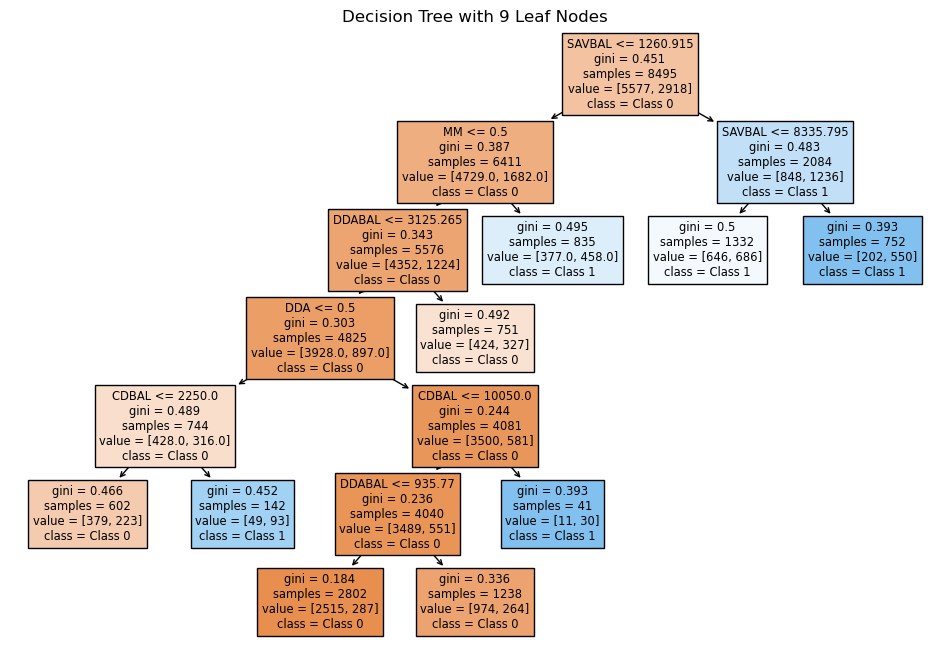

In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Assume X_train, y_train are already defined
num_leaf = 9  # Set the desired number of leaf nodes

# Create and train the decision tree classifier
regressor = DecisionTreeClassifier(random_state=0, max_leaf_nodes=num_leaf)
regressor.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plot_tree(regressor, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'])
plt.title(f'Decision Tree with {num_leaf} Leaf Nodes')
plt.show()


### Understanding the Decision Tree

#### 1. Structure of the Tree

- **Nodes**: Each node represents a decision point in the tree. The tree starts at the root node and splits down into branches based on conditions applied to features.

#### 2. Key Components

##### A. Gini Impurity
- **Definition**: Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. The value ranges from 0 to 1:
  - **0**: Perfectly pure (all samples belong to a single class).
  - **1**: Maximum impurity (samples are evenly distributed across classes).
- **Interpretation**: Lower Gini values indicate a better split in terms of class purity. For example, in your tree:
  - At the root node, the Gini impurity is **0.387**, suggesting that the samples are somewhat mixed between classes.

##### B. Value
- **Definition**: This indicates the number of samples that reach this node and the distribution of classes at this node. The format is `[number from Class 0, number from Class 1]`.
- **Interpretation**: For example, the value at the root node is **[4729.0, 1682.0]**, which means that among the 6411 samples, **4729 belong to Class 0** and **1682 belong to Class 1**.

##### C. Class
- **Definition**: This shows the predicted class label for the samples that reach this node.
- **Interpretation**: The class at each node is determined by the majority class of the samples in that node. For instance, at the root node, the class is **Class 0**, which means that Class 0 has the majority of samples.

#### 3. Reading the Tree

- **Start at the Root**: Begin at the top of the tree (the root node). For each node:
  - Look at the condition (e.g., `MM <= 0.5`).
  - Depending on whether the condition is met, follow the corresponding branch (left or right).

- **Follow the Branches**: Continue following branches based on the features and conditions until you reach a leaf node.

- **Leaf Nodes**: At each leaf node, you will find:
  - The Gini impurity.
  - The value indicating the distribution of classes.
  - The predicted class based on the majority class.

#### 4. Example Walkthrough

Let's consider the first decision in your tree:

- **Node**: `MM <= 0.5`
  - **Gini**: **0.387**
  - **Samples**: **6411**
  - **Value**: **[4729.0, 1682.0]**
  - **Class**: **Class 0**
  
This means that at this node, if the value of the feature `MM` is less than or equal to 0.5, we have a total of 6411 samples, out of which 4729 are Class 0 and 1682 are Class 1, and the predicted class for this node is Class 0.

If the condition is **not met**, you follow the right branch, which leads to another decision point.

#### Summary

By understanding Gini impurity, value, and class predictions, you can effectively interpret how the decision tree model makes its predictions based on the input features. This insight allows you to understand the logic behind the model's classifications and potentially improve model performance through further tuning or feature engineering.

